# Exploratory Data Analysis-I

## Task 
- Finding the Length of each Sequence and Creating a Length Column 
- Calculating GC Ratio and Creating GC Column 
- Finding the % of N and Creating % of N Column
- Per Base Sequence Content
 
## Basic Questions 
- Maximum and minimum sequence length?
- Returns the maximum and minimum Length with their index. 
- Maximum and minimum sequence GC Ratio?
- Returns the maximum and minimum GC Ratio with their index. 
- GC distributions. 
- No. of Gen and bar plot 

In [47]:
# library 
import numpy as np # for linear algebra 
import pandas as pd # for data mangement 
import matplotlib.pyplot as plt # for data visualizations
import seaborn as sns # advance visualizations 

# set figure styles 
plt.rcParams['figure.figsize'] =(10,8)
plt.rcParams['font.size'] = 14
sns.set_style('whitegrid')

# dask 
import dask.array as da # faster numpy calculations 
import dask.dataframe as dd # for faster data management

## Reading and Exploring Data 

In [2]:
# read data 
df = pd.read_csv('./data/')

In [3]:
# examine first few rows 
df.head() 

,Id,Des,Gen,Seq
0,MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...
1,MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...
2,MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...
3,MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...
4,MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...


In [4]:
# columns names 
df.columns 

Index(['Id', 'Des', 'Gen', 'Seq'], dtype='object')

In [5]:
# observations X columns 
df.shape

(55984, 4)

In [6]:
# basic info 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55984 entries, 0 to 55983
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      55984 non-null  object
 1   Des     55984 non-null  object
 2   Gen     55984 non-null  object
 3   Seq     55984 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [7]:
# set index as Id 
df = df.set_index('Id')
df.head() 

,Des,Gen,Seq
Id,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...


## Missing Values 

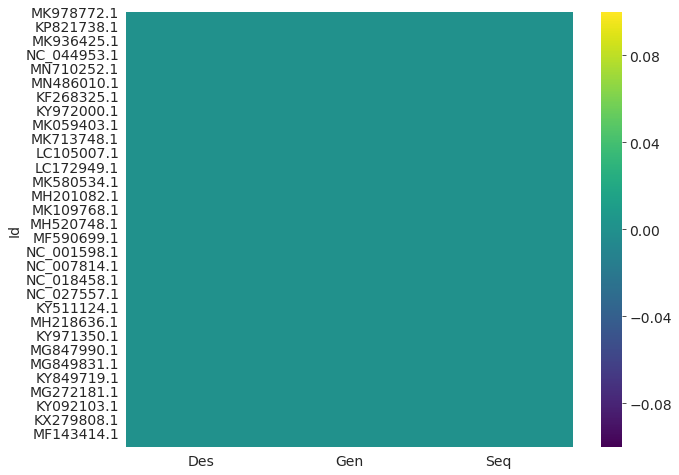

In [8]:
# missing values 
sns.heatmap(df.isnull(), cmap='viridis');

## Data Cleaning 

In [9]:
# replace newline or tab character with empty space
df.Seq.str.replace("\n", "")
df.Seq.str.replace("\t", "")

Id
MK978772.1    TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...
MT291826.1    TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...
MT291827.1    AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...
MT291828.1    AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...
MT291829.1    TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...
                                    ...                        
MF469443.1    TCTGATGGTGTAAGCATGAAAGTATTAGCTTTAAGACACAGTGTGG...
MF469444.1    ATGGCTTCGCTCATTTATAGACAGCTTCTCACTAATTCATATTCAG...
MF469445.1    GGCTTTTAAACGAAGTCTTCGACATGGAGGTTCTGTATTCATTGTC...
MF469446.1    GGCTTTAAAAGAGAGAATTTCCGTTTGGCTAGCGGTTAGCTCCTTT...
KY451945.1    TTGTTAGTCTGTGTGGACCGACAAGGACAGTTCCAAATCGGAAGCT...
Name: Seq, Length: 55984, dtype: object

In [10]:
# check length of first seq 
len(df.Seq.iloc[0]) 

999513

## Task #1: Finding the Length of each Sequences and Creating a Length Column 

In [11]:
# find the length 
L = lambda seq: len(seq)
# test
L('TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTC')

45

In [12]:
# seqLen apply 
df['Len'] = df['Seq'].apply(lambda seq: len(seq))

In [13]:
df.head(10)

,Des,Gen,Seq,Len
Id,,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...,999513
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29774
MT291830.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807
MT291831.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...,29872
MT291832.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,29828
MT291833.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,29821


## Task #2: Calculating GC Ratio and Creating GC Column

### GC Usefulness 
- GC-content (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine (G) or cytosine (C)
- In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA.
- A higher GC-content level indicates a relatively higher melting temperature.
- DNA with low GC-content is less stable than DNA with high GC-content

In [14]:
def calculateGC(seq): 
    """Returns GC Ratio of a sequence"""
    return round((seq.count('G') + seq.count('C'))/len(seq) * 100, 2) 

In [15]:
# test fun
calculateGC('TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT')

30.43

In [16]:
# calculateGC apply
df['GC'] = df['Seq'].apply(calculateGC)

In [17]:
df.head(10)

,Des,Gen,Seq,Len,GC
Id,,,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...,999513,25.35
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.98
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.99
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29774,38.02
MT291830.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99
MT291831.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...,29872,38.00
MT291832.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,29828,38.02
MT291833.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,29821,38.03


## Task #3: Finding the % of N and Creating % of N Column
The bases marked by N could not be identified due to the low quality of the DNA sequence.

In [18]:
counts = lambda seq: round((seq.count('N') /len(seq)) * 100,2)
# test
counts('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN')

8.16

In [19]:
# create a column N 
df['%N'] = df['Seq'].apply(lambda seq: seq.count('N'))

In [20]:
df.head(10)

,Des,Gen,Seq,Len,GC,%N
Id,,,,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...,999513,25.35,0
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99,0
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.98,0
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.99,0
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29774,38.02,0
MT291830.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99,0
MT291831.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...,29872,38.00,0
MT291832.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,29828,38.02,0
MT291833.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,29821,38.03,0


## Task #4: Per Base Sequence Content

In [21]:
A = lambda seq: round((seq.count('A') /len(seq)) * 100,2)
# test
A('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN')

22.45

In [22]:
T = lambda seq: round((seq.count('T') /len(seq)) * 100,2)
# test
T('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN') 

40.82

In [23]:
G = lambda seq: round((seq.count('G') /len(seq)) * 100,2)
# test
G('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN') 

16.33

In [24]:
C = lambda seq: round((seq.count('C') /len(seq)) * 100,2)
# test
C('TGGATTTGTTAGTGATACGANATCGCTTTATAATCATNATGTTTNCTCN') 

12.24

In [25]:
# create a column N 
df['%A'] = df['Seq'].apply(lambda seq: round((seq.count('A') /len(seq)) * 100,2))

In [26]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A
Id,,,,,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...,999513,25.35,0,37.29
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99,0,29.92
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.98,0,29.91
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.99,0,29.91
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29774,38.02,0,29.85


In [27]:
# create a column N 
df['%T'] = df['Seq'].apply(lambda seq: round((seq.count('T') /len(seq)) * 100,2))

In [28]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A,%T
Id,,,,,,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...,999513,25.35,0,37.29,37.36
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99,0,29.92,32.09
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.98,0,29.91,32.10
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.99,0,29.91,32.10
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29774,38.02,0,29.85,32.12


In [29]:
# create a column N 
df['%G'] = df['Seq'].apply(lambda seq: round((seq.count('G') /len(seq)) * 100,2))

In [30]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A,%T,%G
Id,,,,,,,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...,999513,25.35,0,37.29,37.36,12.92
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99,0,29.92,32.09,19.63
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.98,0,29.91,32.10,19.62
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.99,0,29.91,32.10,19.63
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29774,38.02,0,29.85,32.12,19.65


In [31]:
# create a column N 
df['%C'] = df['Seq'].apply(lambda seq: round((seq.count('C') /len(seq)) * 100,2))

In [32]:
df.head() 

,Des,Gen,Seq,Len,GC,%N,%A,%T,%G,%C
Id,,,,,,,,,,
MK978772.1,"Moumouvirus maliensis, complete genome",dsDNA,TGGATTTGTTAGTGATACGAATCGCTTTATAATCATATGTTTCTCT...,999513,25.35,0,37.29,37.36,12.92,12.42
MT291826.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29807,37.99,0,29.92,32.09,19.63,18.36
MT291827.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.98,0,29.91,32.10,19.62,18.36
MT291828.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,29858,37.99,0,29.91,32.10,19.63,18.36
MT291829.1,Severe acute respiratory syndrome coronavirus ...,ssRNA(+),TGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATT...,29774,38.02,0,29.85,32.12,19.65,18.38


## Per Base Sequence Content Plot 

In [ ]:
plt.plot(df['%A'], 'bo')
plt.plot(df['%T'], 'rs', linestyle='--')
plt.plot(df['%G'], 'bs')
plt.plot(df['%C'], 'bo')
plt.xlabel('Base-pair Position')
plt.ylabel('% of Bases')
plt.legend(['%A', '%T', '%G', '%C'])
plt.tight_layout()
plt.show() 

## Question #1: Whta is the maximum and minimum length of sequence?

In [33]:
# length Summary 
df.Len.describe()

count    5.598400e+04
mean     1.355881e+04
std      3.514861e+04
min      1.360000e+02
25%      1.656000e+03
50%      3.780000e+03
75%      9.098250e+03
max      1.473573e+06
Name: Len, dtype: float64

In [34]:
# max length 
df.Len.max() 

1473573

In [35]:
# min length 
df.Len.min() 

136

In [36]:
# avg length 
df.Len.mean() 

13558.81205344384

## Question #2: Returns the maximum and minimum length with their index.

In [37]:
# maximum length with index 
df.loc[df.Len.idxmax()]

Des    Orpheovirus IHUMI-LCC2 genome assembly, comple...
Gen                                                dsDNA
Seq    TTTTATCTATTATAATTTTCTATAACTTATAATTTTTATCTATTAT...
Len                                              1473573
GC                                                 24.98
%N                                                   100
%A                                                 37.58
%T                                                 37.43
%G                                                 12.54
%C                                                 12.44
Name: NC_036594.1, dtype: object

In [38]:
# minimum length with index 
df.loc[df.Len.idxmin()] 

Des    Tulip mild mottle mosaic virus RNA polymerase ...
Gen                                             ssRNA(-)
Seq    GGAAGGTATTTTCATAGAGCTTTGACAAGTGGGTTTAACCCAAAAA...
Len                                                  136
GC                                                 38.97
%N                                                     0
%A                                                 36.03
%T                                                    25
%G                                                 21.32
%C                                                 17.65
Name: NC_043391.1, dtype: object

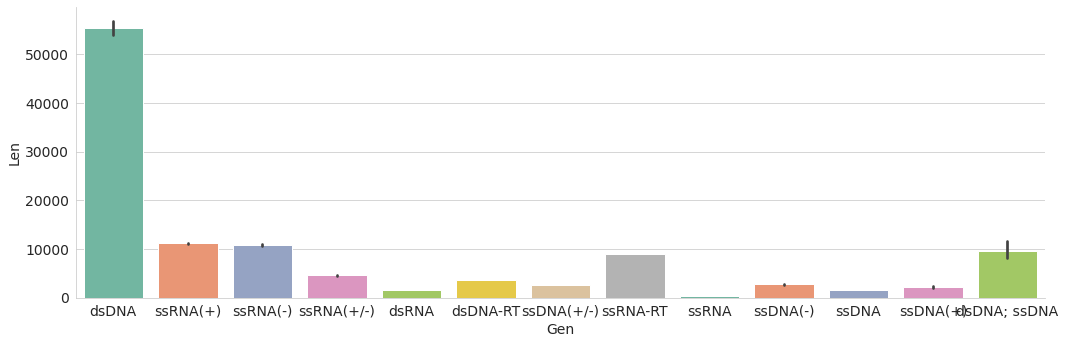

In [39]:
sns.catplot(x='Gen', y='Len', data=df, kind='bar', aspect=3, palette='Set2')

## Question #3: What is the maximum and minimum GC Ratio of sequence?

In [40]:
# GC Summary 
df.GC.describe()

count    55984.000000
mean        42.288187
std          7.803069
min         11.280000
25%         36.050000
50%         41.900000
75%         47.450000
max         78.770000
Name: GC, dtype: float64

## Question #4: Returns the maximum and minimum GC Ratio with their index.

In [41]:
# returns the maximum GC with index 
df.loc[df.GC.idxmax()]

Des    Cervid herpesvirus 2 strain Salla 82 glycoprot...
Gen                                                dsDNA
Seq    CGAGACGTGCATCTTCCACCCCGAGGCGCCCGCCTGCCTGCACCCC...
Len                                                  603
GC                                                 78.77
%N                                                     0
%A                                                  9.78
%T                                                 11.44
%G                                                 35.82
%C                                                 42.95
Name: NC_043057.1, dtype: object

In [42]:
# returns the minimum GC with index 
df.loc[df.GC.idxmin()]

Des    Human papillomavirus type 16 isolate NCI_3414,...
Gen                                                dsDNA
Seq    AAGAAAAGCAAAGACATCTGGACAAAAAGCAAAGATTCCATAATAT...
Len                                                 7466
GC                                                 11.28
%N                                                  5147
%A                                                 10.33
%T                                                  9.46
%G                                                  6.17
%C                                                   5.1
Name: MG848273.1, dtype: object

## Question #4: GC distributions

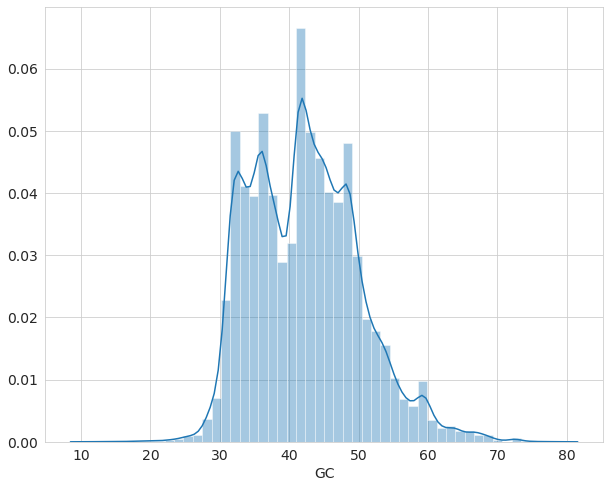

In [43]:
# GC distributions 
sns.distplot(df['GC']); 

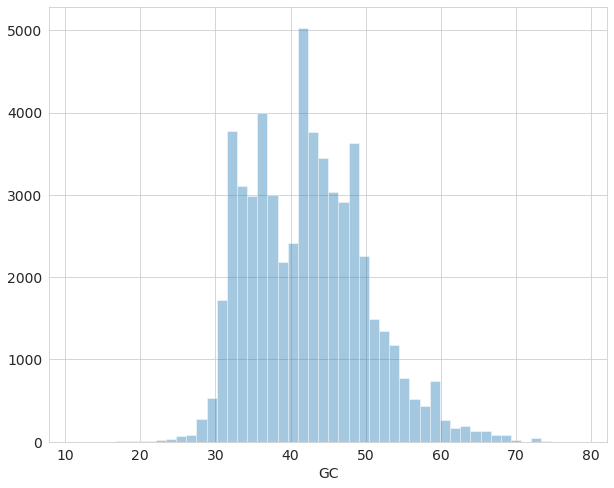

In [44]:
# GC distributions 
sns.distplot(df['GC'], kde=False); 

## Question #5: No. of Gen and bar plot

In [45]:
# Gen counts 
df['Gen'].value_counts() 

dsRNA           18379
ssRNA(+)        11440
dsDNA            8929
ssRNA(-)         5499
ssDNA(+/-)       4641
ssRNA-RT         2261
dsDNA-RT         1578
ssRNA            1023
ssRNA(+/-)        759
ssDNA             702
ssDNA(+)          469
ssDNA(-)          296
dsDNA; ssDNA        8
Name: Gen, dtype: int64

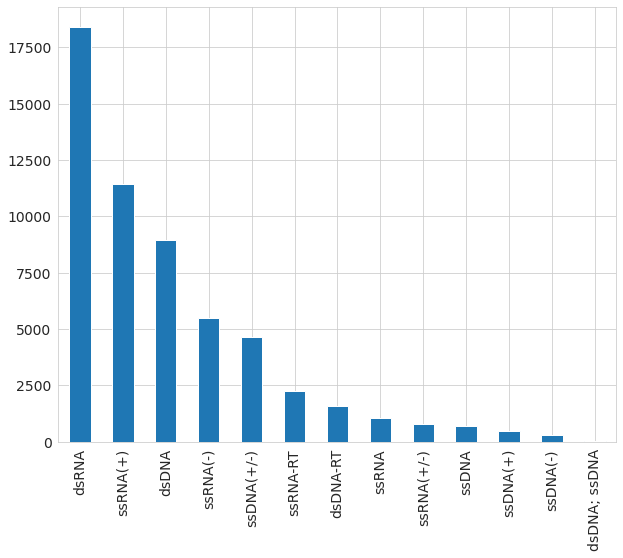

In [46]:
# bar chart 
df['Gen'].value_counts().plot(kind='bar');